# __Plot values from data folder__

In [119]:
import numpy as np
import matplotlib.pyplot as plt

## __Dense tests__

In [120]:
def getMeansAndVars(filenames):
    keys = []
    for a in ["local", "global"]:
        for b in ["noise", "noiseless"]:
            for c in ["dynamic", "static"]:
                for d in ["trc", "error"]:
                    keys += [f"{a}_{b}_{c}_{d}"]

    means = {}
    vars = {}


    for key in keys:
        data_total = np.array([])
        for filename in filenames:
            data_total = np.load(filename)[key] if data_total.size == 0 else  np.vstack((data_total, np.load(filename)[key]))
        means[key] = np.mean(data_total, axis=0)
        vars[key] = np.var(data_total, axis=0)
    
    return means, vars

In [121]:
def barPlot(cs, mean1, var1, str1, label1, mean2, var2, str2, label2, xlabel, ylabel, amp=1):
    width = 0.2
    xlabel = [f"c={c}" for c in cs]
    name_len = np.arange(len(xlabel))
    plt.bar(name_len-width, mean1[str1], yerr=var1[str1]*amp, width=width*2, capsize=3, label=label1)
    plt.bar(name_len+width, mean2[str2], yerr=var2[str2]*amp, width=width*2, capsize=3, label=label2)
    plt.xticks(name_len, xlabel, ha='right')

    plt.ylabel(ylabel)

    plt.legend()
    plt.show()


def barPlot_4entries(cs, mean1, var1, str1, label1, mean2, var2, str2, label2, mean3, var3, str3, label3, mean4, var4, str4, label4, xlabel, ylabel, amp=1, title=None, colors=None):
    plt.figure(figsize=(7, 4))

    width = 0.15
    xlabel = [f"c={c}" for c in cs]
    name_len = np.arange(len(xlabel))

    plt.bar(name_len, mean1[str1], yerr=var1[str1]*amp, width=width, capsize=3, label=label1, color=colors[0] if colors else None)
    plt.bar(name_len+width, mean2[str2], yerr=var2[str2]*amp, width=width, capsize=3, label=label2, color=colors[1] if colors else None)
    plt.bar(name_len+2*width, mean3[str3], yerr=var3[str3]*amp, width=width, capsize=3, label=label3, color=colors[2] if colors else None)
    plt.bar(name_len+3*width, mean4[str4], yerr=var4[str4]*amp, width=width, capsize=3, label=label4, color=colors[3] if colors else None)
    plt.xticks(name_len+width*1.5, xlabel, ha='right')

    plt.ylabel(ylabel)
    plt.title(title if title else "")

    plt.legend()
    plt.show()


def barPlot_8entries(cs, mean1, var1, str1, label1, mean2, var2, str2, label2, mean3, var3, str3, label3, mean4, var4, str4, label4, mean5, var5, str5, label5, mean6, var6, str6, label6, mean7, var7, str7, label7, mean8, var8, str8, label8, xlabel, ylabel, amp=1):
    plt.figure(figsize=(7, 4))

    width = 0.1
    xlabel = [f"c={c}" for c in cs]
    name_len = np.arange(len(xlabel))

    plt.bar(name_len, mean1[str1], yerr=var1[str1]*amp, width=width, capsize=3, label=label1)
    plt.bar(name_len+width, mean2[str2], yerr=var2[str2]*amp, width=width, capsize=3, label=label2)
    plt.bar(name_len+2*width, mean3[str3], yerr=var3[str3]*amp, width=width, capsize=3, label=label3)
    plt.bar(name_len+3*width, mean4[str4], yerr=var4[str4]*amp, width=width, capsize=3, label=label4)
    plt.bar(name_len+4*width, mean5[str5], yerr=var5[str5]*amp, width=width, capsize=3, label=label5)
    plt.bar(name_len+5*width, mean6[str6], yerr=var6[str6]*amp, width=width, capsize=3, label=label6)
    plt.bar(name_len+6*width, mean7[str7], yerr=var7[str7]*amp, width=width, capsize=3, label=label7)
    plt.bar(name_len+7*width, mean8[str8], yerr=var8[str8]*amp, width=width, capsize=3, label=label8)
    plt.xticks(name_len, xlabel, ha='right')

    plt.ylabel(ylabel)

    plt.legend()
    plt.show()

In [129]:
# Dense load
dense_filenames = [f"data/result_dense_test_1.npz", f"data/result_dense_test_2.npz", f"data/result_dense_test_3.npz"]
dense_means, dense_vars = getMeansAndVars(dense_filenames)

# Poisson load
poisson_filenames = [f"data/result_poisson_test_1.npz", f"data/result_poisson_test_2.npz"]
poisson_means, poisson_vars = getMeansAndVars(poisson_filenames)

cs = [1.04e+00, 1.49e+00, 10, 50, 100, 1.58e+02]

In [130]:
dense_vars

{'local_noise_dynamic_trc': array([1.15093628e+08, 1.53259867e+08, 1.84969079e+08]),
 'local_noise_dynamic_error': array([0.00967774, 0.05341066, 0.01443454]),
 'local_noise_static_trc': array([ 5891.55555556, 10526.22222222, 14912.88888889]),
 'local_noise_static_error': array([0.03082042, 0.05871052, 0.00612742]),
 'local_noiseless_dynamic_trc': array([1.23763477e+08, 1.52925829e+08, 7.51588653e+07]),
 'local_noiseless_dynamic_error': array([0.0129169 , 0.06226598, 0.01971677]),
 'local_noiseless_static_trc': array([ 5051.55555556, 12392.88888889, 12886.22222222]),
 'local_noiseless_static_error': array([0.0469803 , 0.07443151, 0.00915178]),
 'global_noise_dynamic_trc': array([2.54227746e+08, 2.49015332e+08, 2.57538148e+08]),
 'global_noise_dynamic_error': array([0.00554812, 0.06457249, 0.01834706]),
 'global_noise_static_trc': array([26638.22222222,  4659.55555556,  8664.88888889]),
 'global_noise_static_error': array([0.02849646, 0.07576485, 0.00745125]),
 'global_noiseless_dynamic

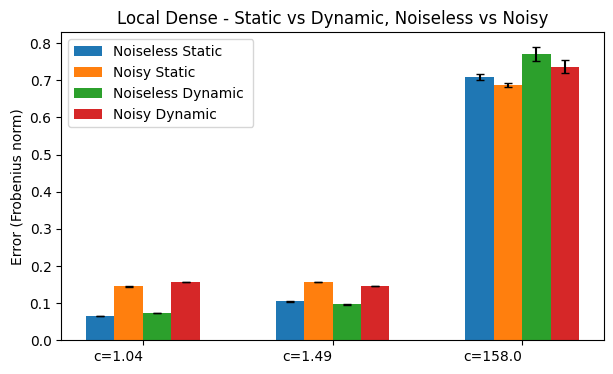

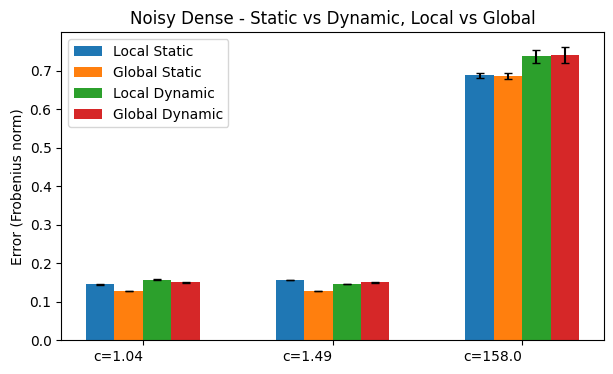

In [124]:
barPlot_4entries(
    cs,
    mean1=dense_means, var1=dense_vars, str1="local_noiseless_static_error", label1="Noiseless Static ",
    mean2=dense_means, var2=dense_vars, str2="local_noise_static_error", label2="Noisy Static ",
    mean3=dense_means, var3=dense_vars, str3="local_noiseless_dynamic_error", label3="Noiseless Dynamic ",
    mean4=dense_means, var4=dense_vars, str4="local_noise_dynamic_error", label4="Noisy Dynamic ",
    xlabel="Condition number", ylabel="Error (Frobenius norm)",amp=1, title = "Local Dense - Static vs Dynamic, Noiseless vs Noisy", )


barPlot_4entries(
    cs,
    mean1=dense_means, var1=dense_vars, str1="local_noise_static_error", label1="Local Static ",
    mean2=dense_means, var2=dense_vars, str2="global_noise_static_error", label2="Global Static ",
    mean3=dense_means, var3=dense_vars, str3="local_noise_dynamic_error", label3="Local Dynamic ",
    mean4=dense_means, var4=dense_vars, str4="global_noise_dynamic_error", label4="Global Dynamic",
    xlabel="Condition number", ylabel="Error (Frobenius norm)", amp=1, title = "Noisy Dense - Static vs Dynamic, Local vs Global")



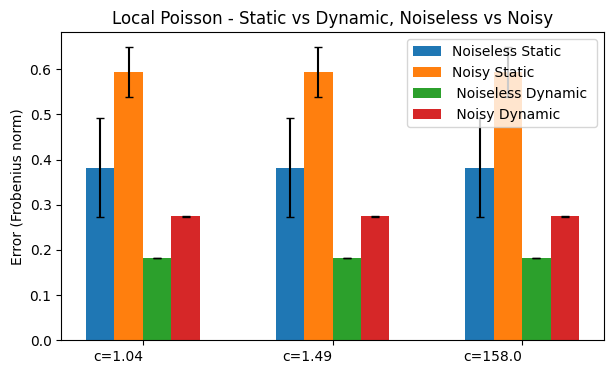

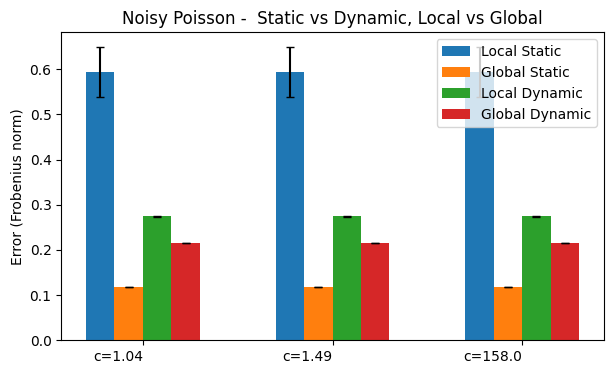

In [114]:
# Poisson load plots
barPlot_4entries(
    cs,
    mean1=poisson_means, var1=poisson_vars, str1="local_noiseless_static_error", label1="Noiseless Static ",
    mean2=poisson_means, var2=poisson_vars, str2="local_noise_static_error", label2="Noisy Static ",
    mean3=poisson_means, var3=poisson_vars, str3="local_noiseless_dynamic_error", label3=" Noiseless Dynamic ",
    mean4=poisson_means, var4=poisson_vars, str4="local_noise_dynamic_error", label4=" Noisy Dynamic ",
    xlabel="Condition number", ylabel="Error (Frobenius norm)", amp=1, title = "Local Poisson - Static vs Dynamic, Noiseless vs Noisy")
barPlot_4entries(
    cs,
    mean1=poisson_means, var1=poisson_vars, str1="local_noise_static_error", label1="Local Static ",
    mean2=poisson_means, var2=poisson_vars, str2="global_noise_static_error", label2="Global Static ",
    mean3=poisson_means, var3=poisson_vars, str3="local_noise_dynamic_error", label3="Local Dynamic ",
    mean4=poisson_means, var4=poisson_vars, str4="global_noise_dynamic_error", label4="Global Dynamic",
    xlabel="Condition number", ylabel="Error (Frobenius norm)", amp=1, title = "Noisy Poisson -  Static vs Dynamic, Local vs Global")

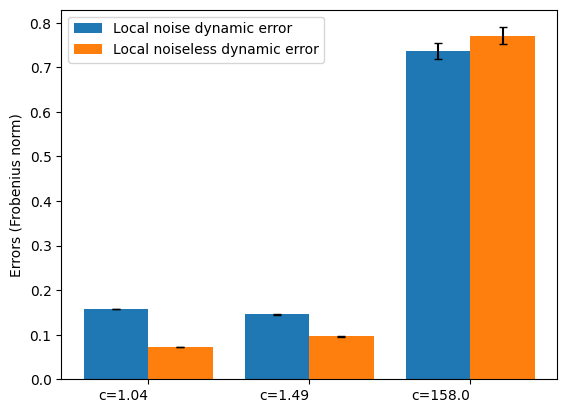

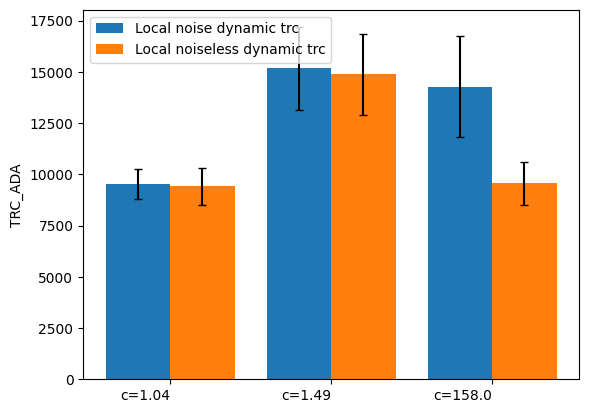

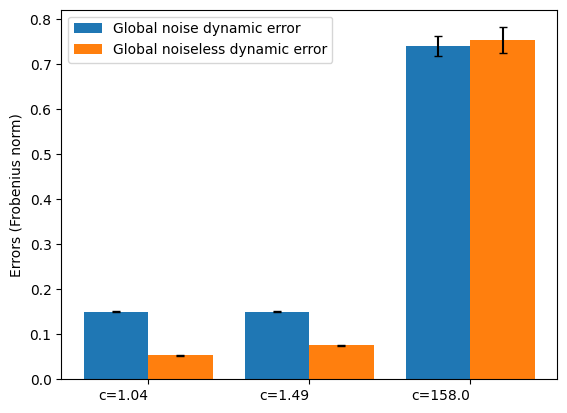

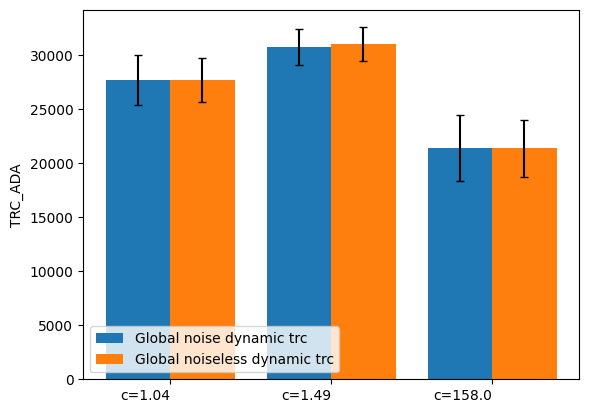

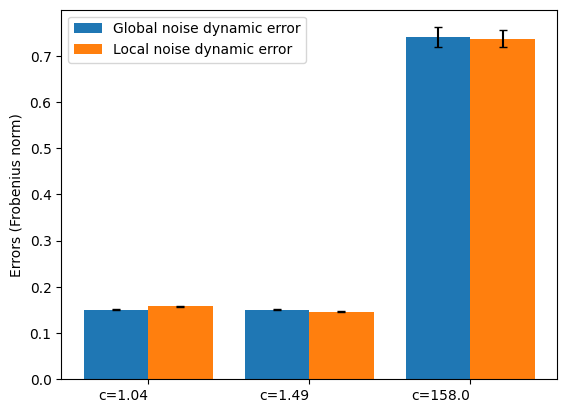

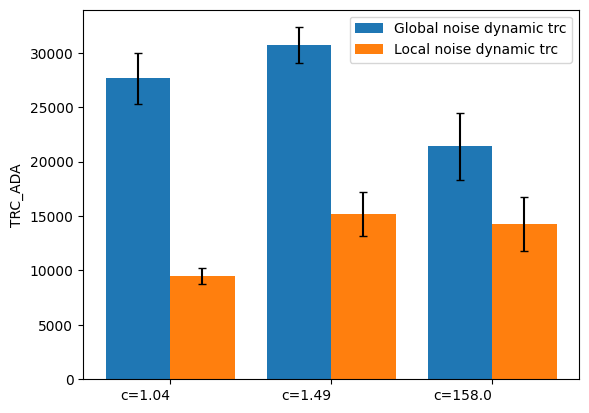

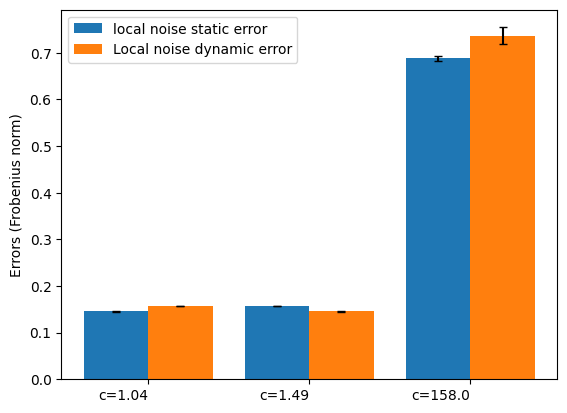

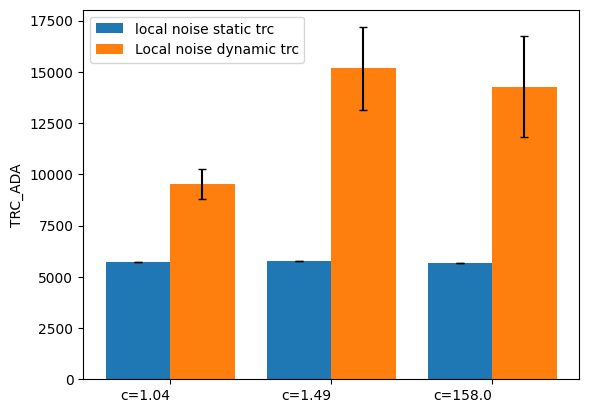

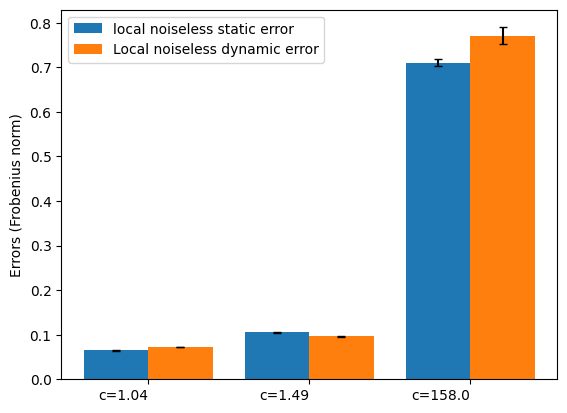

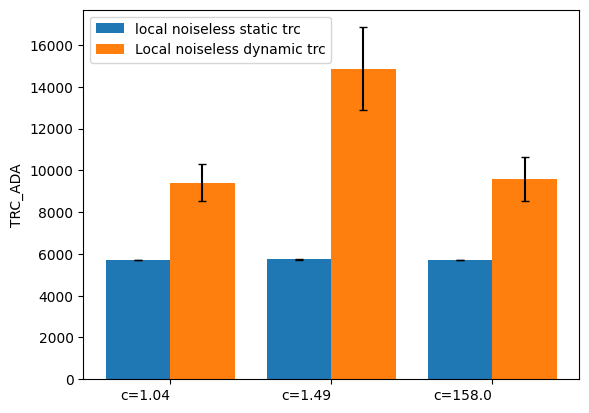

In [17]:
# noise vs noiseless dynamic (local)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noise_dynamic_error", str2="local_noiseless_dynamic_error",
        label1="Local noise dynamic error", label2="Local noiseless dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noise_dynamic_trc", str2="local_noiseless_dynamic_trc",
        label1="Local noise dynamic trc", label2="Local noiseless dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5)

# noise vs noiseless dynamic (global)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="global_noise_dynamic_error", str2="global_noiseless_dynamic_error",
        label1="Global noise dynamic error", label2="Global noiseless dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="global_noise_dynamic_trc", str2="global_noiseless_dynamic_trc",
        label1="Global noise dynamic trc", label2="Global noiseless dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5)

# global vs local (noise dynamic)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="global_noise_dynamic_error", str2="local_noise_dynamic_error",
        label1="Global noise dynamic error", label2="Local noise dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="global_noise_dynamic_trc", str2="local_noise_dynamic_trc",
        label1="Global noise dynamic trc", label2="Local noise dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5) 

# static vs dynamic (local noise)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noise_static_error", str2="local_noise_dynamic_error",
        label1="local noise static error", label2="Local noise dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noise_static_trc", str2="local_noise_dynamic_trc",
        label1="local noise static trc", label2="Local noise dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5) 

# static vs dynamic (local noiseless)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noiseless_static_error", str2="local_noiseless_dynamic_error",
        label1="local noiseless static error", label2="Local noiseless dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noiseless_static_trc", str2="local_noiseless_dynamic_trc",
        label1="local noiseless static trc", label2="Local noiseless dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5) 